
# Image denoising using dictionary learning


An example comparing the effect of reconstructing noisy fragments
of a Lena image using online `DictionaryLearning` method.

In [1]:
print(__doc__)

from PIL import Image

import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

from sklearn.decomposition import MiniBatchDictionaryLearning
from sklearn.feature_extraction.image import extract_patches_2d
from sklearn.feature_extraction.image import reconstruct_from_patches_2d

%matplotlib inline

from keras.preprocessing.image import load_img  
# load an image from file  
image = load_img('lena_gray_256.tif')  

from keras.preprocessing.image import img_to_array  
# convert the image pixels to a numpy array  
image = img_to_array(image) 

image = image[:,:,0]

print("original shape", image.shape)

Automatically created module for IPython interactive environment


Using TensorFlow backend.


('original shape', (256, 256))


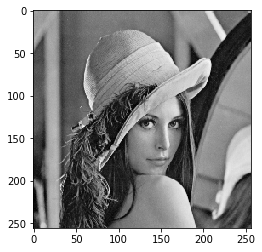

In [2]:
image = image.astype('float32')
image/=255

plt.imshow(image, cmap='gray')

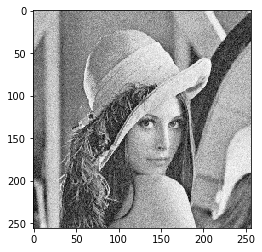

In [3]:
noise = np.random.normal(loc=0, scale=0.05, size=image.shape)
x_test_noisy1 = image + noise
x_test_noisy1 = np.clip(x_test_noisy1, 0., 1.)

plt.imshow(x_test_noisy1, cmap='Greys_r')

imgs = (x_test_noisy1 * 255).astype(np.uint8)
Image.fromarray(imgs).save('lena_noisy.png')

In [4]:
# Extract all reference patches from the left half of the image
print('Extracting reference patches...')
patch_size = (5, 5)
data = extract_patches_2d(image, patch_size)
print(data.shape)

Extracting reference patches...
(63504, 5, 5)


In [5]:
data = data.reshape(data.shape[0], -1)
print(data.shape)

(63504, 25)


In [6]:
data -= np.mean(data, axis=0)
data /= np.std(data, axis=0)

In [7]:
# #############################################################################
# Learn the dictionary from reference patches
print('Learning the dictionary...')
dico = MiniBatchDictionaryLearning(n_components=144, alpha=1, n_iter=500)
V = dico.fit(data).components_

Learning the dictionary...


(144, 25)


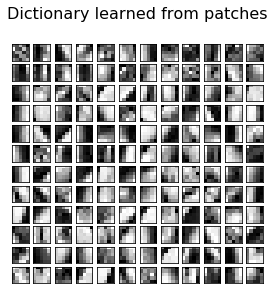

In [8]:
print(V.shape)

plt.figure(figsize=(4.2, 4))
for i, comp in enumerate(V[:144]):
    plt.subplot(12, 12, i + 1)
    plt.imshow(comp.reshape(patch_size), cmap=plt.cm.gray_r,
               interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.suptitle('Dictionary learned from patches\n', fontsize=16)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)

In [9]:
# #############################################################################
# Extract noisy patches and reconstruct them using the dictionary

print('Extracting noisy patches... ')
data = extract_patches_2d(x_test_noisy1, patch_size)
data = data.reshape(data.shape[0], -1)
intercept = np.mean(data, axis=0)
data -= intercept

Extracting noisy patches... 


Orthogonal Matching Pursuit
2 atoms...


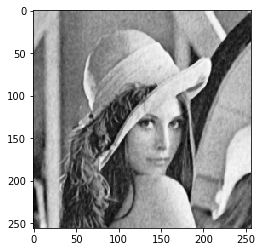

In [10]:
print('Orthogonal Matching Pursuit\n2 atoms' + '...')
reconstructions = x_test_noisy1.copy()

dico.set_params(transform_algorithm='omp', **{'transform_n_nonzero_coefs': 2})
code = dico.transform(data)
patches = np.dot(code, V)

patches += intercept
patches = patches.reshape(len(data), *patch_size)

reconstructions = reconstruct_from_patches_2d(patches, (256, 256))

plt.imshow(reconstructions, cmap='Greys_r')

In [11]:
imgs = (reconstructions * 255).astype(np.uint8)
Image.fromarray(imgs).save('lena_denoise_from_original.png')

In [12]:
# Extract all reference patches from the left half of the image
print('Extracting reference patches...')
patch_size = (5, 5)
data = extract_patches_2d(x_test_noisy1, patch_size)
print(data.shape)

Extracting reference patches...
(63504, 5, 5)


In [13]:
data = data.reshape(data.shape[0], -1)
print(data.shape)

data -= np.mean(data, axis=0)
data /= np.std(data, axis=0)

(63504, 25)


In [14]:
# #############################################################################
# Learn the dictionary from reference patches
print('Learning the dictionary...')
dico = MiniBatchDictionaryLearning(n_components=144, alpha=1, n_iter=500)
V = dico.fit(data).components_

Learning the dictionary...


(144, 25)


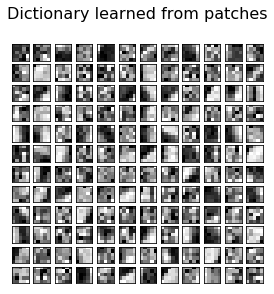

In [15]:
print(V.shape)

plt.figure(figsize=(4.2, 4))
for i, comp in enumerate(V[:144]):
    plt.subplot(12, 12, i + 1)
    plt.imshow(comp.reshape(patch_size), cmap=plt.cm.gray_r,
               interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.suptitle('Dictionary learned from patches\n', fontsize=16)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)

Extracting noisy patches... 
Orthogonal Matching Pursuit
2 atoms...


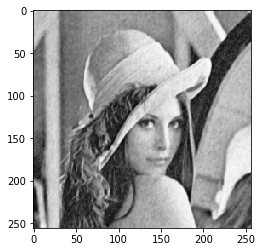

In [19]:
# #############################################################################
# Extract noisy patches and reconstruct them using the dictionary

print('Extracting noisy patches... ')
data = extract_patches_2d(x_test_noisy1, patch_size)
data = data.reshape(data.shape[0], -1)
intercept = np.mean(data, axis=0)
data -= intercept

print('Orthogonal Matching Pursuit\n2 atoms' + '...')
reconstructions_frm_noise = x_test_noisy1.copy()

dico.set_params(transform_algorithm='omp', **{'transform_n_nonzero_coefs': 2})
code = dico.transform(data)
patches = np.dot(code, V)

patches += intercept
patches = patches.reshape(len(data), *patch_size)

reconstructions_frm_noise = reconstruct_from_patches_2d(patches, (256, 256))

plt.imshow(reconstructions_frm_noise, cmap='Greys_r')

In [20]:
imgs = (reconstructions_frm_noise * 255).astype(np.uint8)
Image.fromarray(imgs).save('lena_denoise_from_noise2.png')